# How Did State COVID-19 Policies Shape Consumer Spending and Public Health Outcomes?

# PROJECT 1
**PLEASE READ**
\
After completing Project 1, I spoke with my professor and she suggested that I change my research topic entirely. Based on her feedback, I shifted my focus for Project 2 to a new research question and dataset. While this project explores a different issue, I have tried to incorporate the feedback I received from Project 1 to improve my approach. This includes refining my data analysis techniques, structuring my arguments more clearly, and using different plots. Although the topics are different, this project is based on the feedback from Project 1.


## 1. Introduction
The COVID-19 pandemic caused severe disruptions to both economic activity and public health, forcing governments to make difficult policy choices. U.S. states implemented different strategies, ranging from strict lockdowns and business closures to more relaxed approaches. These policies influenced consumer behavior, labor market trends, and health outcomes in unequal ways across states (Chetty et al., 2020). While some policies successfully slowed virus transmission, they also impacted economic resilience, raising important questions about the trade-offs between public health and economic recovery.

### 1.1 State Policies and Consumer Spending
Research shows that both government-mandated restrictions and voluntary behavioral changes played a role in economic decline (Goolsbee & Syverson, 2020; ; Toxvaerd, 2021). Some studies argue that fear of the virus, rather than lockdown policies alone, led to reduced consumer spending (Chetty et al., 2020). Even in states with fewer restrictions, individuals avoided non-essential spending in high-contact sectors such as restaurants, entertainment, and travel. However, lockdowns did have an independent impact on reducing consumer mobility and economic activity (Ligo et al., 2021; Dave et al., 2021).

Government stimulus measures helped offset some of the economic decline (Baker et al., 2020). Research on the U.S. stimulus checks shows that low-income households increased their spending sharply following payments, although the effect was temporary (Coibion et al., 2020). Similarly, the expansion of unemployment benefits helped sustain consumption for displaced workers (Gupta et al., 2020). However, once these benefits ended, economic disparities widened, as lower-income households cut back spending more than wealthier individuals (Crossley et al., 2021).

### 1.2 Economic Inequality and Recovery Patterns
The impact of COVID-19 policies varied across different demographic groups. Research shows that lower-income and minority communities suffered greater financial distress, job losses, and health consequences (Courtemanche et al., 2020). In contrast, wealthier individuals shifted their spending online, adapting more easily to economic restrictions (Andersen et al., 2022). This shift contributed to widening economic inequalities during the pandemic.

Recovery from the crisis also differed across states. Studies suggest that consumer confidence, rather than the lifting of restrictions alone, was a stronger driver of economic recovery (Serrano-Alarcón et al., 2021). States that reopened aggressively sometimes faced COVID-19 resurgences, which led to prolonged economic instability (Friedson et al., 2020). This suggests that uncontrolled reopenings may have delayed long-term recovery rather than accelerating it.

### 1.3 Balancing Public Health and Economic Outcomes
State policymakers had to balance economic recovery with public health risks. Studies comparing different policy responses find that countries with fewer restrictions experienced similar declines in consumer spending as those with strict lockdowns, suggesting that voluntary behavioral changes mattered as much as policies (Andersen et al., 2020). In the U.S., state reopening decisions were often influenced by political and economic pressures rather than public health data (Hsiang et al., 2020; Dave et al., 2021).

Clear public messaging may have played an important role in economic resilience. Research suggests that states with better public communication strategies saw higher compliance with safety measures, reducing economic disruptions (Carrieri et al., 2021). This indicates that policy effectiveness depended not only on regulations but also on public perception and trust.

### 1.4 Research Contribution
While previous studies have analyzed the effects of COVID-19 policies on consumer spending and public health outcomes, fewer have examined the long-term economic resilience of different states. This study fills that gap by analyzing how different policy choices influenced both economic and health outcomes over time. By integrating mobility data, government policy indices, and economic indicators, this research aim to provide a comprehensive analysis of the trade-offs between economic recovery and public health protection.

In addition to traditional regression analysis and visualization, this study uses two methodological extensions. First, machine learning models—specifically a regression tree and a random forest. These are introduced to explore nonlinear patterns and interaction effects that may not be fully captured by linear models. These tools provide a complementary perspective on the drivers of consumer spending during the pandemic. Second, external data on weekly petroleum consumption is scraped from the U.S. Energy Information Administration (EIA) to examine how mobility-related fuel demand responded to COVID-19 policies. This novel dataset extends the analysis beyond state policy and mobility into energy behavior, providing a more comprehensive view of pandemic-era economic activity.


### 1.5 Data Sources and Cleaning Process
This study uses a combined dataset to examine how state-level COVID-19 policies influenced economic resilience. Consumer spending data comes from Opportunity Insights’ Economic Tracker. It tracks daily and weekly financial transactions to measure changes in household spending during lockdowns, stimulus payments, and reopenings (Chetty et al., 2020). Mobility data is from Ang et al. (2020), which provides human movement inflow and outflow data at different geographic levels in the U.S. This data helps analyze how mobility restrictions affected economic activity. Policy data is sourced from the Oxford COVID-19 Government Response Tracker (OxCGRT). It records daily policy changes, such as lockdowns, public health rules, and economic aid programs (Hale et al., 2021). Public health data comes from the Johns Hopkins University COVID-19 Dashboard, which tracks COVID-19 cases, hospitalizations, and deaths in real-time (Dong, Du, & Gardner, 2020).

Given the interest of this paper, the dependent variable (Y) has chosen to be consumer spending, which reflects economic resilience during the pandemic. It measures how households adjusted their spending in response to lockdowns, stimulus payments, and mobility changes. Spending is a key indicator of economic recovery, making it essential for understanding policy effectiveness. The independent variables (X) include mobility patterns, government policy indices, and COVID-19 incidence rates. Mobility data tracks movement trends, showing how restrictions and voluntary behaviors affected economic activity. Policy indices measure lockdown strictness, financial aid, and public health rules, which directly influenced consumer confidence and business operations. COVID-19 cases help separate policy effects from individual risk perception, as rising cases often lead to reduced spending even without government mandates. Together, these variables explain why spending patterns varied across states, helping to assess the trade-offs between economic recovery and public health.

To ensure data accuracy, all sources were aligned at the state-day level. This makes it easier to compare policy changes with economic and health trends. Missing values in policy and mobility data were filled using state-level averages to prevent gaps in the regression analysis. The final dataset combines economic trends, movement patterns, policy enforcement, and health data. 



### 1.6 Summary Statistics Tables

In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.api as sm

os.chdir("/Users/xiuzh/Desktop/eco225-project-code-ruibosun") 

# Load the merged dataset
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)

import pandas as pd

# Load dataset
df = pd.read_csv("for_regression.csv",low_memory=False)

# Select relevant columns (Y variable + at least 5 X variables)
selected_columns = [
    "spend_all",  # Dependent variable (Y) - total consumer spending
    "mobility_inflow", "mobility_outflow",  # Mobility indicators
    "StringencyIndex_Average", "GovernmentResponseIndex_Average",  # Policy indices
    "ContainmentHealthIndex_Average", "EconomicSupportIndex",  # Additional policy indices
    "Incident_Rate",
    "Confirmed","Deaths", "avg_pop_stay_at_home","avg_trips" # Public health indicator - COVID-19 case incidence rate
]

# Compute summary statistics
summary_stats = df[selected_columns].describe()


In [65]:
import pandas as pd
from IPython.display import display, HTML

# Load dataset
df = pd.read_csv("for_regression.csv", low_memory=False)

# Select relevant columns
selected_columns = [
    "spend_all",
    "mobility_inflow", "mobility_outflow",
    "StringencyIndex_Average",  "EconomicSupportIndex",
    "Incident_Rate", 
    "avg_pop_stay_at_home", "avg_trips"
]

# Compute summary statistics
summary_stats = df[selected_columns].describe().round(3)

# Render as scaled HTML
html = summary_stats.to_html(classes="table table-striped", border=0)
display(HTML(f"""
<div style='transform: scale(0.75); transform-origin: top left;'>
    <h3>Summary Statistics of Selected Variables</h3>
    {html}
</div>
"""))


,spend_all,mobility_inflow,mobility_outflow,StringencyIndex_Average,GovernmentResponseIndex_Average,EconomicSupportIndex,Incident_Rate,avg_pop_stay_at_home,avg_trips
count,61614.000,61614.000,61614.000,61614.000,61614.000,61614.000,61614.000,981.000,981.000
mean,0.074,707672.407,707366.741,39.284,48.210,38.653,14911.875,80661.622,821488.855
std,0.107,673949.670,674129.917,16.487,10.554,21.433,11116.859,86687.597,798103.303
min,-0.431,2406.000,3012.000,16.450,28.010,0.000,0.000,6068.313,59382.852
25%,0.018,212156.870,213959.949,24.350,39.470,25.000,4532.651,21224.489,251650.211
50%,0.074,707672.407,707366.741,38.890,48.210,37.500,13170.577,43970.315,486909.292
75%,0.138,812822.455,799365.062,51.390,54.690,50.000,25162.742,105268.647,1064652.618
max,0.540,4841437.000,4841598.000,93.520,80.210,100.000,58927.992,425634.034,3426194.000


The summary statistics table has show that the dependent variable, spend_all, represents consumer spending. The average value is 0.074, meaning spending increased by 7.4% on average. However, there is substantial variation, with a standard deviation of 10.7%. The minimum value of -0.43 suggests that spending declined in some cases, while the maximum of 54% indicates strong growth in certain states or time periods.

Among the independent variables, mobility inflow and outflow measure the movement of people into and out of a state. Both have high averages, around 707,000, with a large spread. Some states have as few as 2,406 inflow and 3,012 outflow, while others exceed 4.8 million, reflecting different population sizes and travel patterns.

The Stringency Index, which captures the strictness of COVID-19 restrictions, has an average value of 39.3 on a scale from 0 to 100. Some states had very relaxed policies (16.5), while others imposed strict measures (93.5). Other policy indices follow a similar trend. The Economic Support Index, which measures financial aid, has an average of 38.7, but varies widely, with some states providing no economic support (0) and others reaching the highest level (100).

The Incident Rate, representing COVID-19 cases per 100,000 people, averages 14,912 but varies significantly, with a standard deviation of 11,116. Some areas reported no cases (0), while others had infection rates exceeding 58,927 per 100,000. 

Finally, the average population staying at home is 80,661, though this varies greatly. Some states saw as few as 6,068 people staying home, while others had up to 425,634. Similarly, the average number of trips per state is around 821,488, with significant variation between states. The high variability in these mobility measures suggests that different states had different behavioral responses to the pandemic.

To further understand these patterns, the next step is to analyze the data by subgroups, comparing the groups of high and low policy stringency. This helps reveal how different levels of government restrictions influenced mobility, spending, and public health outcomes across states.

 ### 1.7 Plots, Histograms, Figures

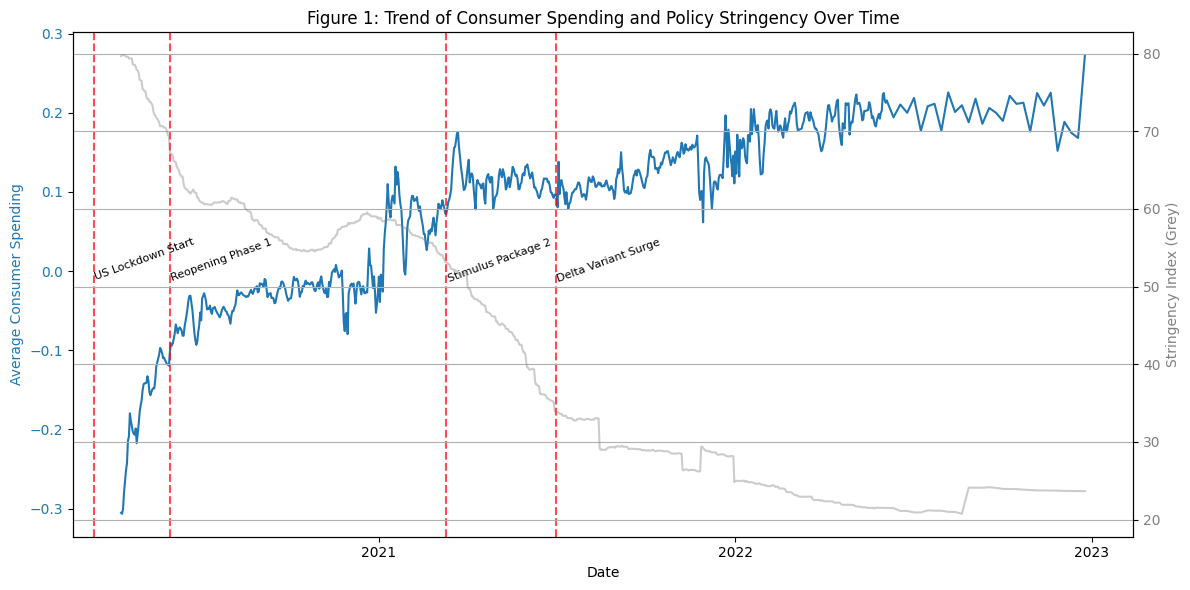

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)

# Ensure correct formats
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["spend_all"] = pd.to_numeric(df["spend_all"], errors="coerce")
df["StringencyIndex_Average"] = pd.to_numeric(df["StringencyIndex_Average"], errors="coerce")

# Drop missing values in key columns
df = df.dropna(subset=["spend_all", "StringencyIndex_Average"])

# Define policy dates
policy_dates = {
    "US Lockdown Start": "2020-03-15",
    "Reopening Phase 1": "2020-06-01",
    "Stimulus Package 2": "2021-03-11",
    "Delta Variant Surge": "2021-07-01"
}
policy_dates = {k: pd.to_datetime(v) for k, v in policy_dates.items()}

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Main line: Consumer Spending
sns.lineplot(data=df, x="Date", y="spend_all", estimator="mean", errorbar=None, ax=ax1, color="tab:blue")
ax1.set_ylabel("Average Consumer Spending", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Secondary axis: Stringency Index
ax2 = ax1.twinx()
sns.lineplot(data=df, x="Date", y="StringencyIndex_Average", estimator="mean", errorbar=None,
             ax=ax2, color="grey", alpha=0.4)
ax2.set_ylabel("Stringency Index (Grey)", color="grey")
ax2.tick_params(axis='y', labelcolor="grey")

# Add vertical lines and annotations
for label, date in policy_dates.items():
    ax1.axvline(date, color='red', linestyle='--', alpha=0.7)
    ax1.text(date, df["spend_all"].min()*-0.1, label, rotation=20, verticalalignment='top', fontsize=8, color='black')

# Formatting
ax1.set_title("Figure 1: Trend of Consumer Spending and Policy Stringency Over Time")
ax1.set_xlabel("Date")
ax1.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Figure 1 was chosen because it shows how consumer spending changed over time in response to major COVID-19 events and policy shifts. The trend highlights a sharp decline in spending at the start of the pandemic, followed by gradual recovery. Key policy moments, such as lockdowns, stimulus packages, and variant surges, are marked to show their potential effects. Spending initially dropped but rebounded as restrictions eased and financial aid was distributed. This pattern suggests that both government policies and public health developments influenced economic behavior. The figure directly connects to the research question by showing how state-level stringency and support measures affected consumer spending over time.

From an economic perspective, this pattern supports standard theory, which suggests that government intervention through fiscal policy can stabilize demand during economic shocks. The initial decline in spending reflects precautionary savings behavior, where consumers cut non-essential expenditures due to uncertainty about income, employment, and mobility. The gradual recovery aligns with periods of declining policy stringency and targeted aid, reinforcing the importance of timing and structure in public interventions.

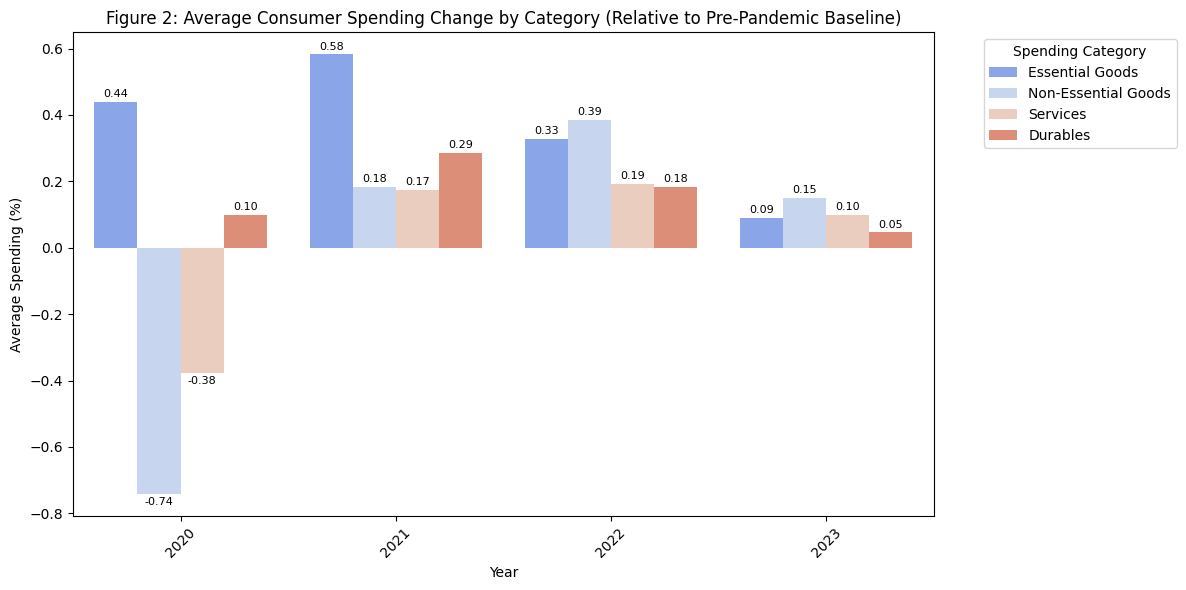

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)

# Ensure datetime format
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

# Spending categories
spending_columns = [
    "spend_grf", "spend_hic", "spend_retail_w_grocery",
    "spend_apg", "spend_aer", "spend_tws", "spend_retail_no_grocery",
    "spend_remoteservices", "spend_hcs", "spend_inperson",
    "spend_durables", "spend_nondurables"
]

# Convert to numeric
df[spending_columns] = df[spending_columns].apply(pd.to_numeric, errors="coerce")

# Aggregate categories
df["spend_essentials"] = df[["spend_grf", "spend_hic", "spend_retail_w_grocery"]].sum(axis=1, skipna=True)
df["spend_non_essentials"] = df[["spend_apg", "spend_aer", "spend_tws", "spend_retail_no_grocery"]].sum(axis=1, skipna=True)
df["spend_services"] = df[["spend_remoteservices", "spend_hcs", "spend_inperson"]].sum(axis=1, skipna=True)
df["spend_durables"] = df[["spend_durables", "spend_nondurables"]].sum(axis=1, skipna=True)

# Aggregate by year
aggregated_columns = ["spend_essentials", "spend_non_essentials", "spend_services", "spend_durables"]
df_yearly = df.groupby("Year")[aggregated_columns].mean().reset_index()

# Reshape for plotting
df_melted = df_yearly.melt(id_vars=["Year"], value_vars=aggregated_columns,
                           var_name="Spending Category", value_name="Percentage")

# Clean up legend labels
df_melted["Spending Category"] = df_melted["Spending Category"].replace({
    "spend_essentials": "Essential Goods",
    "spend_non_essentials": "Non-Essential Goods",
    "spend_services": "Services",
    "spend_durables": "Durables"
})

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=df_melted, x="Year", y="Percentage", hue="Spending Category", palette="coolwarm")

# Add value labels on top
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

# Formatting
plt.xlabel("Year")
plt.ylabel("Average Spending (%)")
plt.title("Figure 2: Average Consumer Spending Change by Category (Relative to Pre-Pandemic Baseline)")
plt.legend(title="Spending Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Figure 2 provides a breakdown of consumer spending across different categories relative to pre-pandemic levels. In 2020, essential spending rose by 0.44, while non-essential goods dropped sharply by -0.74, reflecting highly inelastic versus elastic demand patterns. Service-based spending declined by -0.38, showing strong sensitivity to lockdowns and social distancing. Durables dropped slightly by -0.10.

By 2021, spending rebounded. Essential goods increased to 0.58, the highest among all categories, while non-essential goods climbed back to 0.18, and services and durables recovered to 0.17 and 0.29, respectively. This recovery continued moderately in 2022, with essential goods at 0.33, non-essentials at 0.39, services at 0.19, and durables at 0.18.

In 2023, however, all categories saw lower levels of spending change. Essential goods dipped to 0.09, while non-essentials and services settled at 0.15 and 0.10, respectively. Durables reached 0.05, showing the weakest post-recovery performance.

These trends align with income elasticity of demand theory. Goods that are necessities (inelastic demand) remained in demand regardless of economic conditions, while elastic demand categories like services and non-essential goods showed significant fluctuation. The deep and prolonged decline in services supports the idea that supply-side restrictions, not just demand, influenced economic activity. Even with policy support and reopening, some sectors did not fully recover—suggesting lasting changes in consumer confidence and behavior.

This figure complements Figure 1 by quantifying which areas of consumer spending were most affected by policy interventions and economic uncertainty, reinforcing our main finding that mobility and stringency policies had category-specific effects.


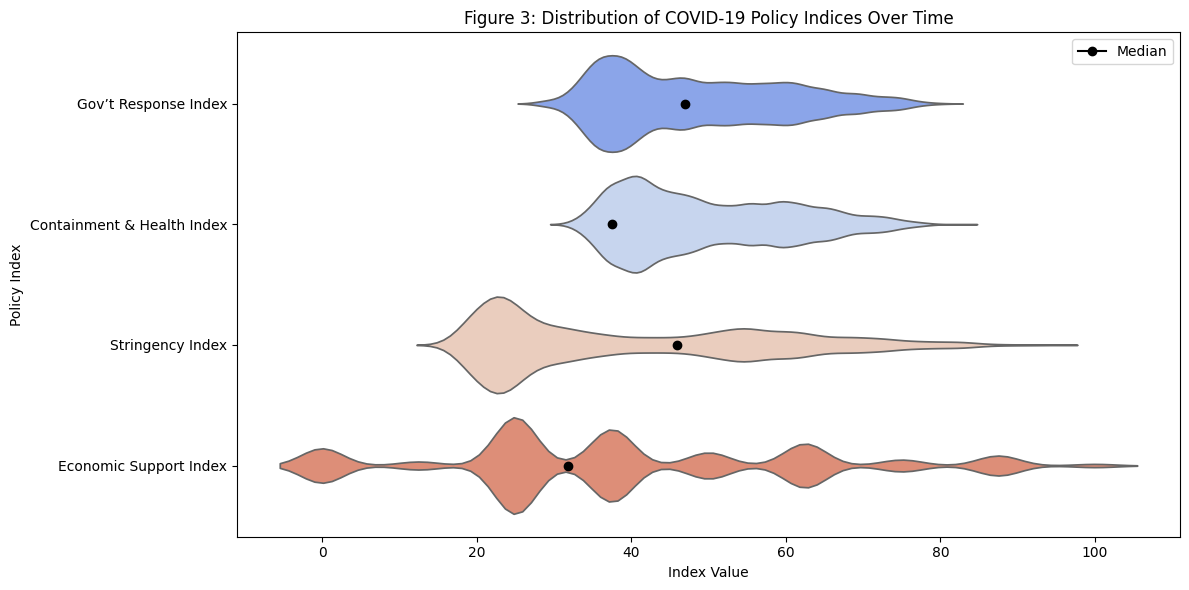

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)

# Ensure Date is in datetime format and extract year-month
df["Date"] = pd.to_datetime(df["Date"])
df["YearMonth"] = df["Date"].dt.to_period("M")

# Select relevant policy indices
policy_indices = [
    "GovernmentResponseIndex_Average",
    "ContainmentHealthIndex_Average",
    "StringencyIndex_Average",
    "EconomicSupportIndex"
]

# Convert selected columns to numeric
for col in policy_indices:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Reshape to long format
df_melted = df.melt(
    id_vars=["YearMonth"],
    value_vars=policy_indices,
    var_name="Policy Index",
    value_name="Index Value"
)

# Compute medians
medians = df_melted.groupby("Policy Index")["Index Value"].median().reset_index()

# Set nicer display names for plotting
display_names = {
    "GovernmentResponseIndex_Average": "Gov’t Response Index",
    "ContainmentHealthIndex_Average": "Containment & Health Index",
    "StringencyIndex_Average": "Stringency Index",
    "EconomicSupportIndex": "Economic Support Index"
}
df_melted["Policy Index"] = df_melted["Policy Index"].map(display_names)
medians["Policy Index"] = medians["Policy Index"].map(display_names)

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_melted,
    x="Index Value",
    y="Policy Index",
    hue="Policy Index",
    palette="coolwarm",
    density_norm="width",
    inner=None,
    legend=False
)

# Add markers for medians
for i, row in medians.iterrows():
    plt.plot(row["Index Value"], i, marker="o", color="black", label="Median" if i == 0 else "")

# Final formatting
plt.title("Figure 3: Distribution of COVID-19 Policy Indices Over Time")
plt.xlabel("Index Value")
plt.ylabel("Policy Index")
plt.legend()
plt.tight_layout()
plt.show()


Figure 3 presents the distribution of key policy indices, including the Government Response Index, Containment Health Index, Stringency Index, and Economic Support Index. The violin plots indicate considerable variation in policy stringency and support across states. Some states implemented consistently strict measures, while others had more moderate or fluctuating responses. Economic support also varied, with some states providing substantial aid and others offering limited financial assistance.

The differences in policy intensity suggest that economic outcomes, including spending behavior, may be state-specific rather than uniform nationwide. The figure also raises questions about the effectiveness of strict measures versus targeted interventions in shaping economic recovery. By illustrating these policy distributions, Figure 3 provides context for understanding why consumer spending varied across different states.


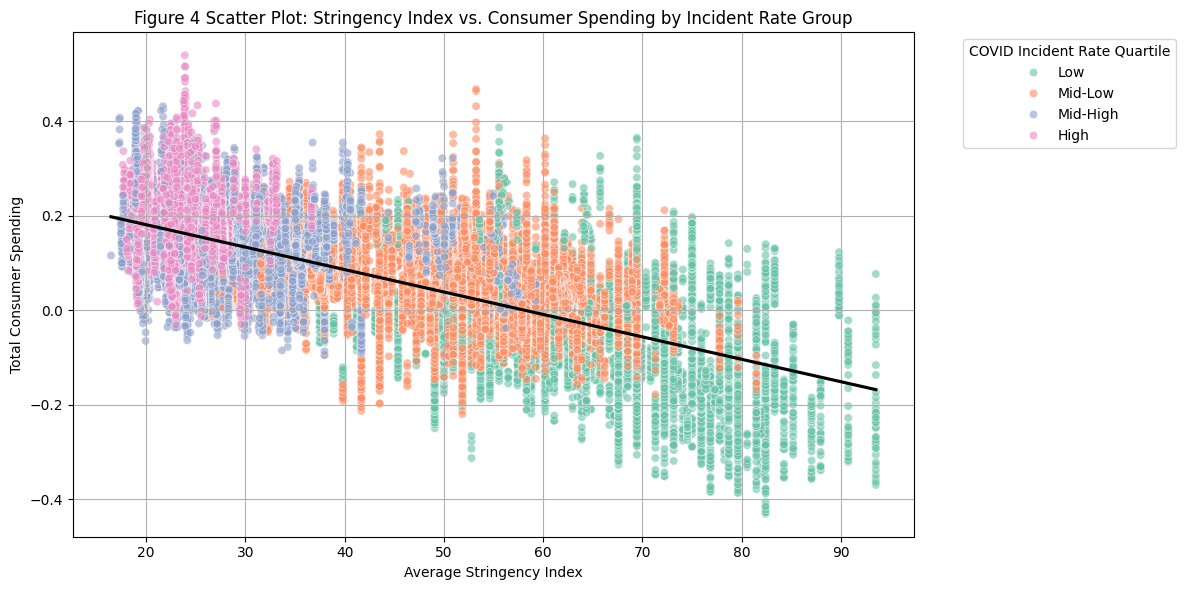

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)

# Ensure proper types
df["StringencyIndex_Average"] = pd.to_numeric(df["StringencyIndex_Average"], errors="coerce")
df["spend_all"] = pd.to_numeric(df["spend_all"], errors="coerce")
df["Incident_Rate"] = pd.to_numeric(df["Incident_Rate"], errors="coerce")

# Create subgroup: quartiles based on incident rate
df["Incident_Group"] = pd.qcut(df["Incident_Rate"], q=4, labels=["Low", "Mid-Low", "Mid-High", "High"])

# Drop rows with missing values
df_clean = df.dropna(subset=["StringencyIndex_Average", "spend_all", "Incident_Group"])

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clean,
    x="StringencyIndex_Average",
    y="spend_all",
    hue="Incident_Group",
    palette="Set2",
    alpha=0.6
)

# Add overall regression line
sns.regplot(
    data=df_clean,
    x="StringencyIndex_Average",
    y="spend_all",
    scatter=False,
    color="black",
    line_kws={"label": "Overall Trend"}
)

# Labels and formatting
plt.title("Figure 4 Scatter Plot: Stringency Index vs. Consumer Spending by Incident Rate Group")
plt.xlabel("Average Stringency Index")
plt.ylabel("Total Consumer Spending")
plt.legend(title="COVID Incident Rate Quartile", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Figure 4 illustrates the relationship between policy stringency and consumer spending, segmented by incident rate quartiles. Across all groups, higher stringency levels are generally associated with lower consumer spending, reflecting the economic costs of stricter pandemic policies.

The negative slope of the overall trend line confirms that tighter restrictions reduced economic activity. Interestingly, the pattern varies by incident rate group. States in the “Low” and “Mid-Low” quartiles (lighter green and orange) show a wider spread in spending, suggesting that even moderate restrictions significantly influenced behavior in areas with fewer cases. In contrast, states with “High” incident rates (pink) exhibit tighter clustering at lower spending levels, likely reflecting both policy enforcement and public fear. This figure supports the research question by showing how both policy severity and pandemic intensity jointly shaped spending outcomes. It highlights that in lower-incidence states, even small changes in restrictions had visible economic effects.

## PROJECT 2

### 2.1 The Message

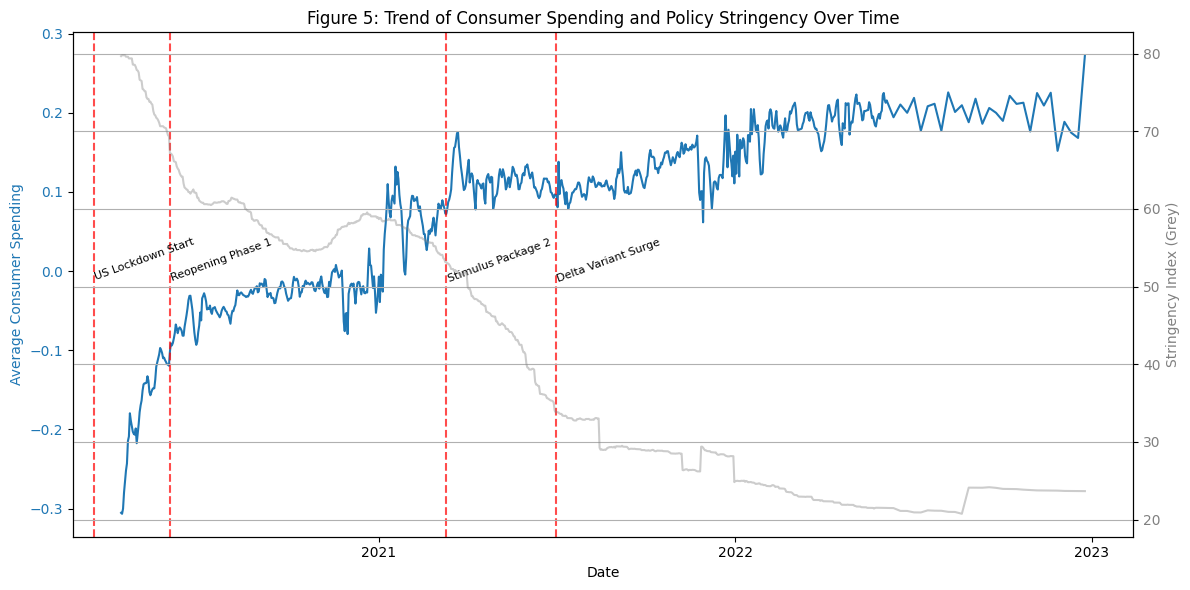

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv("final_cleaned_spending_policies.csv", low_memory=False)

# Ensure correct formats
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["spend_all"] = pd.to_numeric(df["spend_all"], errors="coerce")
df["StringencyIndex_Average"] = pd.to_numeric(df["StringencyIndex_Average"], errors="coerce")

# Drop missing values in key columns
df = df.dropna(subset=["spend_all", "StringencyIndex_Average"])

# Define policy dates
policy_dates = {
    "US Lockdown Start": "2020-03-15",
    "Reopening Phase 1": "2020-06-01",
    "Stimulus Package 2": "2021-03-11",
    "Delta Variant Surge": "2021-07-01"
}
policy_dates = {k: pd.to_datetime(v) for k, v in policy_dates.items()}

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Main line: Consumer Spending
sns.lineplot(data=df, x="Date", y="spend_all", estimator="mean", errorbar=None, ax=ax1, color="tab:blue")
ax1.set_ylabel("Average Consumer Spending", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Secondary axis: Stringency Index
ax2 = ax1.twinx()
sns.lineplot(data=df, x="Date", y="StringencyIndex_Average", estimator="mean", errorbar=None,
             ax=ax2, color="grey", alpha=0.4)
ax2.set_ylabel("Stringency Index (Grey)", color="grey")
ax2.tick_params(axis='y', labelcolor="grey")

# Add vertical lines and annotations
for label, date in policy_dates.items():
    ax1.axvline(date, color='red', linestyle='--', alpha=0.7)
    ax1.text(date, df["spend_all"].min()*-0.1, label, rotation=20, verticalalignment='top', fontsize=8, color='black')

# Formatting
ax1.set_title("Figure 5: Trend of Consumer Spending and Policy Stringency Over Time")
ax1.set_xlabel("Date")
ax1.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


The main message from this is: Consumer spending dropped sharply at the start of the pandemic, then rose gradually as restrictions eased and stimulus packages were introduced, closely tracking the decline in policy stringency.

### 2.2 Maps and Interpretations

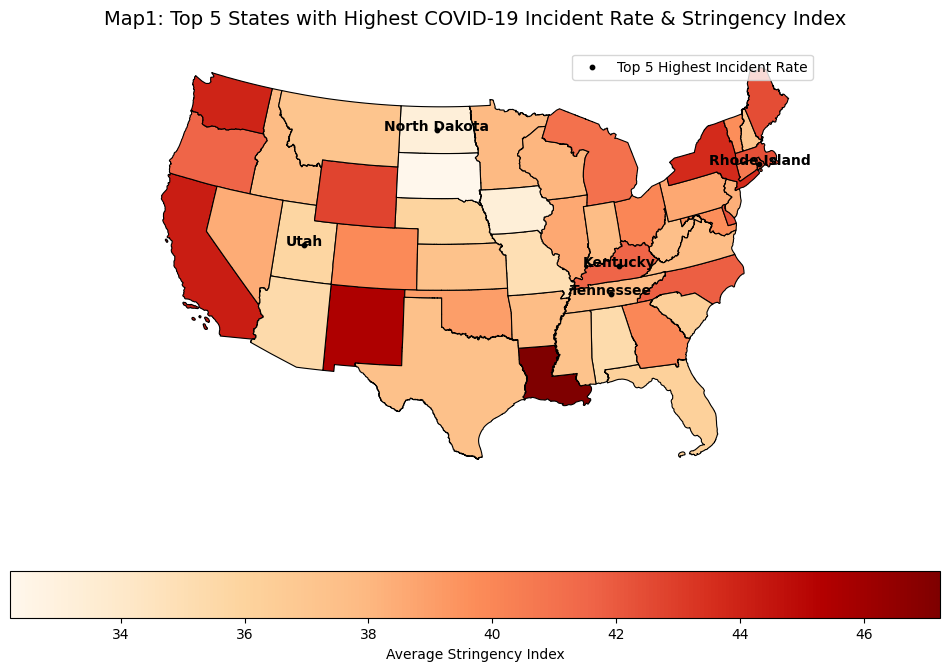

In [85]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define File Paths
shapefile_path = "/Users/xiuzh/Desktop/eco225-project-code-ruibosun/tl_2024_us_state/tl_2024_us_state.shp"
csv_path = "final_cleaned_spending_policies.csv"

# Step 2: Load the Shapefile
us_states = gpd.read_file(shapefile_path)

# Step 3: Load & Process COVID-19 Data
df = pd.read_csv(csv_path, low_memory=False)

# List of states and territories to exclude
excluded_states = ["Alaska", "Hawaii", "American Samoa", "Guam", 
                   "Northern Mariana Islands", "Puerto Rico", "Virgin Islands", "District of Columbia"]

# Drop excluded states from both datasets
df_filtered = df[~df["State"].isin(excluded_states)]
gdf_filtered = us_states[~us_states["NAME"].isin(excluded_states)]  # Filter shapefile

# Aggregate Stringency Index and Incident Rate by state (mean values)
df_agg = df_filtered.groupby("State", as_index=False).agg({
    "StringencyIndex_Average": "mean",
    "Incident_Rate": "mean"
})

# Merge shapefile with aggregated data
gdf = gdf_filtered.merge(df_agg, left_on="NAME", right_on="State", how="left")

# Fix CRS before calculating centroids
gdf = gdf.to_crs(epsg=2163)  # Re-project to a projected CRS

# Calculate state centroids for bubble placement
gdf["coords"] = gdf["geometry"].centroid
gdf["x"] = gdf["coords"].apply(lambda p: p.x)
gdf["y"] = gdf["coords"].apply(lambda p: p.y)

# Step 4: Identify Top 5 States with the Highest Incident Rate
top_5_states = gdf.nlargest(5, "Incident_Rate")

# Step 5: Plot the map with the top 5 states highlighted
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot base map (Stringency Index choropleth)
gdf.plot(column="StringencyIndex_Average", cmap="OrRd", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"label": "Average Stringency Index", "orientation": "horizontal"}, ax=ax)

# Highlight the top 5 states with black markers
ax.scatter(top_5_states["x"], top_5_states["y"], s=10, color="black", label="Top 5 Highest Incident Rate")

# Add annotations (state names) to the top 5 states
for _, row in top_5_states.iterrows():
    ax.text(row["x"], row["y"], row["State"], fontsize=10, color="black", weight="bold", ha="center")

# Title and formatting
ax.set_title("Map1: Top 5 States with Highest COVID-19 Incident Rate & Stringency Index", fontsize=14)
plt.axis("off")
plt.legend()
plt.show()


This map 1 highlights the top five states with the highest COVID-19 incident rates while showing the average stringency index across all U.S. states. Darker shades represent states with stricter COVID-19 policies, while lighter shades indicate less restrictive measures. The five states with the highest incident rates: North Dakota, Rhode Island, Kentucky, Tennessee, and Utah are labeled for emphasis.

The map reveals that high infection rates do not always correspond with stricter policies. Some high-incident states had moderate stringency levels, suggesting that other factors, such as public compliance, health infrastructure, and economic activity, may have influenced outcomes.

Comparing this to previous findings helps examine whether higher restrictions effectively reduced infection rates or if external factors played a larger role. This visualization also highlights potential outliers, where strict policies did not necessarily result in better public health outcomes. Further analysis can explore the relationship between policy effectiveness, mobility patterns, and economic support in these states.



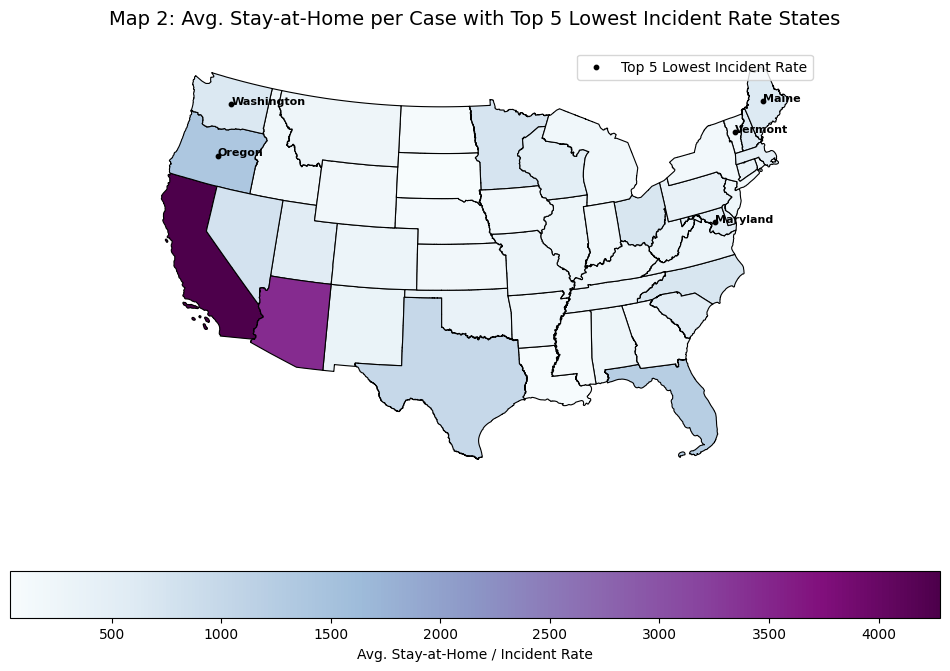

In [81]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define File Paths
shapefile_path = "/Users/xiuzh/Desktop/eco225-project-code-ruibosun/tl_2024_us_state/tl_2024_us_state.shp"
csv_path = "final_cleaned_spending_policies.csv"

# Step 2: Load the Shapefile
us_states = gpd.read_file(shapefile_path)

# Step 3: Load & Process COVID-19 Data
df = pd.read_csv(csv_path, low_memory=False)

# Step 4: Exclude non-mainland states
excluded_states = ["Alaska", "Hawaii", "American Samoa", "Guam", 
                   "Northern Mariana Islands", "Puerto Rico", "Virgin Islands", "District of Columbia"]
df_filtered = df[~df["State"].isin(excluded_states)].copy()
gdf_filtered = us_states[~us_states["NAME"].isin(excluded_states)].copy()

# Step 5: Aggregate relevant variables
df_filtered["StayHome_per_Case"] = df_filtered["avg_pop_stay_at_home"] / (df_filtered["Incident_Rate"] + 1)
df_agg = df_filtered.groupby("State", as_index=False).agg({
    "StayHome_per_Case": "mean",
    "Incident_Rate": "mean"
})

# Step 6: Merge and project
gdf = gdf_filtered.merge(df_agg, left_on="NAME", right_on="State", how="left")
gdf = gdf.to_crs(epsg=2163)

# Step 7: Get centroids for label placement
gdf["coords"] = gdf["geometry"].centroid
gdf["x"] = gdf["coords"].apply(lambda p: p.x)
gdf["y"] = gdf["coords"].apply(lambda p: p.y)

# Step 8: Identify top 5 states with lowest incident rate
top_5_lowest = gdf.nsmallest(5, "Incident_Rate")

# Step 9: Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Choropleth: StayHome_per_Case
gdf.plot(column="StayHome_per_Case", cmap="BuPu", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"label": "Avg. Stay-at-Home / Incident Rate", "orientation": "horizontal"}, ax=ax)

# Overlay: Top 5 states with lowest incident rate
ax.scatter(top_5_lowest["x"], top_5_lowest["y"], s=10, color="black", label="Top 5 Lowest Incident Rate")

# Annotate states
for _, row in top_5_lowest.iterrows():
    ax.text(row["x"], row["y"], row["State"], fontsize=8, color="black", weight="bold", ha="left")

# Title and layout
ax.set_title("Map 2: Avg. Stay-at-Home per Case with Top 5 Lowest Incident Rate States", fontsize=14)
plt.axis("off")
plt.legend()
plt.show()


This map 2 shows the average stay-at-home behavior relative to COVID-19 cases by state, highlighting the top five states with the lowest incident rates. States like Vermont, Maine, and Maryland had fewer COVID-19 cases but still maintained moderate or high stay-at-home activity. This suggests that strong public compliance or early preventive behavior may have contributed to lower infection rates in these regions. This supports the idea that mobility reduction played a key role in shaping health outcomes during the pandemic. Even without strict policies, voluntary behavioral changes may influence case numbers. The variation across states highlights that not only policy stringency, but also public response, shaped the trade-off between economic activity and health outcomes. 

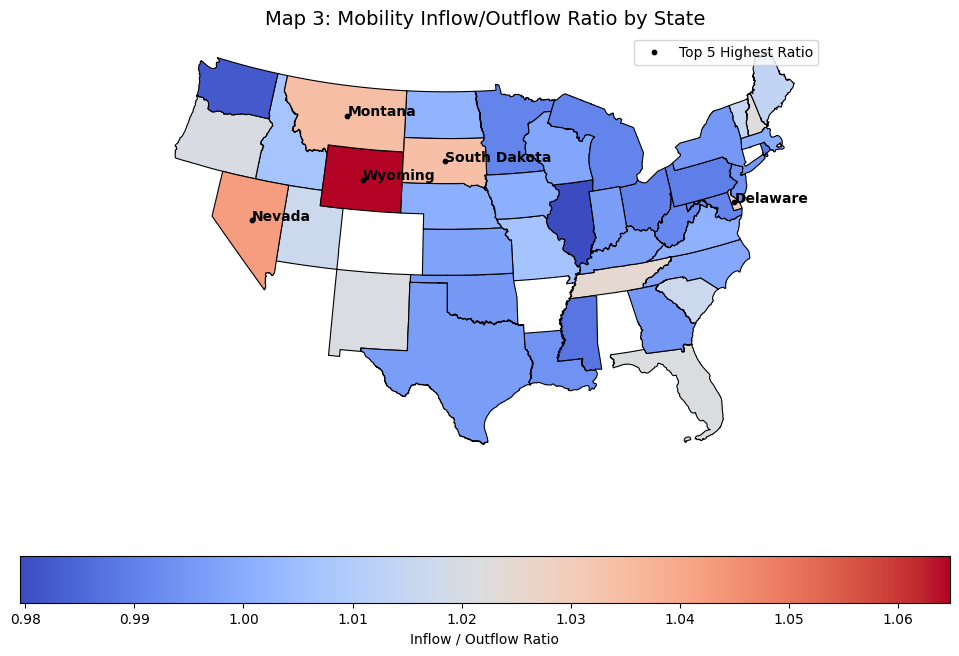

In [84]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# File paths
shapefile_path = "/Users/xiuzh/Desktop/eco225-project-code-ruibosun/tl_2024_us_state/tl_2024_us_state.shp"
csv_path = "final_cleaned_spending_policies.csv"

# Load shapefile and dataset
us_states = gpd.read_file(shapefile_path)
df = pd.read_csv(csv_path, low_memory=False)

# Exclude non-mainland states
excluded_states = ["Alaska", "Hawaii", "American Samoa", "Guam", 
                   "Northern Mariana Islands", "Puerto Rico", "Virgin Islands", "District of Columbia"]
df_filtered = df[~df["State"].isin(excluded_states)].copy()
gdf_filtered = us_states[~us_states["NAME"].isin(excluded_states)].copy()

# Compute inflow/outflow ratio
df_filtered["Inflow_Outflow_Ratio"] = df_filtered["mobility_inflow"] / (df_filtered["mobility_outflow"] + 1)

# Aggregate by state
df_agg = df_filtered.groupby("State", as_index=False).agg({
    "Inflow_Outflow_Ratio": "mean"
})

# Merge and reproject
gdf = gdf_filtered.merge(df_agg, left_on="NAME", right_on="State", how="left")
gdf = gdf.to_crs(epsg=2163)

# Add centroids for plotting
gdf["coords"] = gdf["geometry"].centroid
gdf["x"] = gdf["coords"].apply(lambda p: p.x)
gdf["y"] = gdf["coords"].apply(lambda p: p.y)

# Identify top 5 states with highest inflow/outflow ratio
top_5_ratio = gdf.nlargest(5, "Inflow_Outflow_Ratio")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

gdf.plot(
    column="Inflow_Outflow_Ratio",
    cmap="coolwarm",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Inflow / Outflow Ratio", "orientation": "horizontal"},
    ax=ax
)

# Highlight top 5
ax.scatter(top_5_ratio["x"], top_5_ratio["y"], s=10, color="black", label="Top 5 Highest Ratio")

# Annotate top states
for _, row in top_5_ratio.iterrows():
    ax.text(row["x"], row["y"], row["State"], fontsize=10, color="black", weight="bold", ha="left")

# Title and layout
ax.set_title("Map 3: Mobility Inflow/Outflow Ratio by State", fontsize=14)
plt.axis("off")
plt.legend()
plt.show()


This map 3 displays the average ratio of mobility inflow to outflow by state, with the top five states having the highest ratios labeled. A higher ratio indicates more people entering than leaving, which may reflect relative economic attractiveness or less restrictive mobility policies. From a research perspective, this helps explain observed differences in consumer spending across states. In states with high inflow, the added presence of non-residents may contribute to higher local spending—even if resident activity is lower. This also aligns with regression findings in the follow sub-section, which is  showing mobility outflow positively linked to spending, suggesting that economic activity can shift geographically rather than disappear.

### 2.3 Regression

In [25]:

# Re-import necessary libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer
from IPython.display import display, HTML

# Reload dataset
df = pd.read_csv("for_regression.csv", low_memory=False)

# Ensure all columns are numeric
numeric_columns = ["mobility_outflow", "mobility_inflow", 
                   "GovernmentResponseIndex_Average", 
                   "ContainmentHealthIndex_Average", 
                   "StringencyIndex_Average", 
                   "EconomicSupportIndex", "Incident_Rate", "spend_all"]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Fill missing values with the state-level mean
df[numeric_columns] = df.groupby("State")[numeric_columns].transform(lambda x: x.fillna(x.mean()))

# Define dependent variable (Y)
y = df["spend_all"]

# Store all models
models = []

# Model 1: Baseline Model (All Explanatory Variables)
X1 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average",
         "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex"]]
X1 = sm.add_constant(X1)
models.append(sm.OLS(y, X1).fit())

# Model 2: Excluding Mobility Variables
X2 = df[["GovernmentResponseIndex_Average", "ContainmentHealthIndex_Average", 
         "StringencyIndex_Average", "EconomicSupportIndex"]]
X2 = sm.add_constant(X2)
models.append(sm.OLS(y, X2).fit())

# Model 3: Interaction Between Stringency Index & Economic Support Index
df["Stringency_Economic_Interaction"] = df["StringencyIndex_Average"] * df["EconomicSupportIndex"]
X3 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
         "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex", "Stringency_Economic_Interaction"]]
X3 = sm.add_constant(X3)
models.append(sm.OLS(y, X3).fit())

# Model 4: Quadratic Term for Stringency Index (Non-Linear Model)
df["Stringency_Squared"] = df["StringencyIndex_Average"] ** 2
X4 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
         "ContainmentHealthIndex_Average", "StringencyIndex_Average", "Stringency_Squared", "EconomicSupportIndex"]]
X4 = sm.add_constant(X4)
models.append(sm.OLS(y, X4).fit())

# Model 5: Mobility Variables Only
X5 = df[["mobility_outflow", "mobility_inflow"]]
X5 = sm.add_constant(X5)
models.append(sm.OLS(y, X5).fit())

# Model 6: Log of Economic Support Index (Log Transformation)
df["Log_EconomicSupport"] = np.log(df["EconomicSupportIndex"] + 1)  # Adding 1 to avoid log(0)
X6 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
         "ContainmentHealthIndex_Average", "StringencyIndex_Average", "Log_EconomicSupport"]]
X6 = sm.add_constant(X6)
models.append(sm.OLS(y, X6).fit())

# Model 7: Dummy Variable for Above-Median Stringency Index
df["High_Stringency"] = (df["StringencyIndex_Average"] > df["StringencyIndex_Average"].median()).astype(int)
X7 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
         "ContainmentHealthIndex_Average", "High_Stringency", "EconomicSupportIndex"]]
X7 = sm.add_constant(X7)
models.append(sm.OLS(y, X7).fit())

# Model 8: Subgroup Analysis (High Incident Rate Only)
df_high_incident = df[df["Incident_Rate"] > df["Incident_Rate"].median()]
X8 = df_high_incident[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
                       "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex"]]
X8 = sm.add_constant(X8)
y8 = df_high_incident["spend_all"]
models.append(sm.OLS(y8, X8).fit())

# Model 9: Subgroup Analysis (Low Incident Rate Only)
df_low_incident = df[df["Incident_Rate"] <= df["Incident_Rate"].median()]
X9 = df_low_incident[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
                      "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex"]]
X9 = sm.add_constant(X9)
y9 = df_low_incident["spend_all"]
models.append(sm.OLS(y9, X9).fit())

# Model 10: Interaction Between Mobility and Stringency Index
df["Mobility_Stringency_Interaction"] = df["mobility_outflow"] * df["StringencyIndex_Average"]
X10 = df[["mobility_outflow", "mobility_inflow", "GovernmentResponseIndex_Average", 
          "ContainmentHealthIndex_Average", "StringencyIndex_Average", "EconomicSupportIndex", "Mobility_Stringency_Interaction"]]
X10 = sm.add_constant(X10)
models.append(sm.OLS(y, X10).fit())

# Create Stargazer table
stargazer = Stargazer(models)
stargazer.title("Regression Results")
stargazer.show_model_numbers(True)
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4",
                         "Model 5", "Model 6", "Model 7", "Model 8",
                         "Model 9", "Model 10"])
stargazer.show_degrees_of_freedom(True)
stargazer.significant_digits(3)

# Display the formatted table
html = stargazer.render_html()
display(HTML(f"""
<div style='transform: scale(0.75); transform-origin: top left;'>
    {html}
</div>
"""))


The regression results provide insights into how state-level COVID-19 policies shaped consumer spending and public health outcomes.

Model 1 serves as a baseline, incorporating mobility, government response measures, containment policies, and economic support. The results confirm that higher policy stringency reduced consumer spending, but economic support measures helped offset part of this decline. For example, a one-unit increase in the Stringency Index is associated with a 0.009 decrease in average spending, holding other factors constant, which is both statistically and economically meaningful. EconomicSupportIndex shows a positive and significant coefficient (0.076), meaning stronger support programs are associated with higher spending. The mobility effects are mixed. Mobility outflow is positively associated with spending, indicating that economic activity shifted elsewhere, while mobility inflow negatively impacts spending, possibly due to economic uncertainty or restrictions limiting business operations.

Model 2 removes mobility variables to focus only on policy effects. The results remain stable, reinforcing the idea that restrictions alone significantly influenced consumer behavior, independent of movement patterns. This finding is consistent with Goolsbee & Syverson (2020), who found that consumer spending declined primarily due to restrictions rather than voluntary behavioral changes. However, it also suggests that consumer confidence and enforcement of policies may have varied across states, influencing the effectiveness of restrictions.

Model 3 introduces an interaction between stringency and economic support. The negative interaction term indicates that financial aid does not fully offset the economic costs of strict restrictions. This aligns with Chetty et al. (2020), who found that stimulus payments boosted short-term spending but were less effective in states with prolonged lockdowns. The magnitude may seem small, but it compounds when both components are large, suggesting important diminishing returns. The results suggest that broad economic relief measures may be less effective in heavily restricted areas unless paired with policies that encourage safe economic activity.

Model 4 tests for non-linear effects by adding a squared term for the Stringency Index. The results indicate diminishing returns to restrictions: early policies sharply reduce spending, but additional restrictions beyond a certain point have smaller incremental effects. This is reflected in the negative and significant coefficient on the squared term. This reflects the adaptive behavior of consumers and businesses, where prolonged restrictions lead to alternative ways of operating rather than further economic decline. This finding supports Crossley et al. (2021), who observed that the strongest economic shocks occurred at the beginning of the pandemic, with later restrictions having less impact.

Model 5 isolates the effect of mobility on spending, confirming that mobility outflow increases spending, while mobility inflow reduces it. This suggests that some economic activity was displaced rather than eliminated, meaning that inter-state spillovers played a role in shaping state-level spending trends. The magnitudes, though small, are statistically significant and consistent with the idea that where people go matters for economic outcomes.

Model 6 applies a log transformation to the Economic Support Index. The results show that government aid remains effective but has diminishing returns, supporting the theory of diminishing marginal propensity to consume—additional aid leads to smaller spending increases. The log specification confirms that the largest effects come at the lower end of aid levels.

Model 7 introduces a dummy variable for high-stringency states, confirming that states with above-median restrictions had lower consumer spending. This supports the idea that even moderate levels of restrictions created significant economic disruptions, reinforcing Toxvaerd (2021), who argued that voluntary behavioral changes can sometimes achieve similar health outcomes without the same economic costs. The coefficient of -0.054 shows a meaningful average gap in spending between high and low stringency environments.

Models 8 and 9 conduct a subgroup analysis, splitting the sample into high-incident and low-incident states. The results show that restrictions had a stronger economic impact in high-incident states, suggesting that both policy enforcement and public fear played a role in reducing spending. In contrast, low-incident states experienced a weaker spending decline, indicating that consumer behavior was more resilient when public health risks were lower. This split helps clarify how the same policies may produce different effects depending on context, which future research could extend with fixed effects to control for unobserved state characteristics.

Model 10 introduces an interaction between mobility and policy stringency. The negative coefficient suggests that in states with strict restrictions, mobility increases did not lead to higher spending. This implies that even if people were moving, they were not engaging in economic activity at normal levels due to uncertainty and continued restrictions.

Across all models, Model 4 is the preferred specification as it accounts for both the direct and diminishing effects of policy restrictions. The results confirm that policy stringency significantly reduced consumer spending, but with diminishing effects at extreme levels. Economic support played a stabilizing role, though its effectiveness was weaker in states with strict restrictions.

The findings suggest several important policy insights. First, while lockdowns effectively limited mobility and public health risks, their economic costs were high, and additional restrictions showed diminishing economic effects. This suggests that policies should focus on balancing economic stability with health outcomes, using targeted restrictions rather than broad lockdowns. Second, economic support measures helped sustain consumption, but their effectiveness depended on broader restrictions. This highlights the need for flexible stimulus policies—when restrictions are high, direct aid alone is not sufficient to restore normal economic activity. Instead, aid should be paired with policies that facilitate safe consumer engagement, such as support for remote services, local business adjustments, and phased reopening plans. Third, mobility patterns suggest that economic activity was displaced rather than eliminated, indicating that regional economic spillovers played a key role in shaping state-level recoveries. Future regressions with fixed effects or instrumental variables could help isolate these dynamics more precisely. Future crisis policies should consider cross-state economic interactions, particularly in highly mobile regions where state policies may indirectly influence neighboring economies.



## 3.1 Potential Data to Scrape

For this project, I chose to scrape weekly petroleum product consumption data from the U.S. Energy Information Administration (EIA) using their API. This includes data on distillate fuel oil (EPD0) and motor gasoline (EPM0F). These two fuel types are directly tied to economic activity and mobility, which makes them useful for analyzing how COVID-19 affected energy demand. By aligning these trends with policy dates, I can better understand how pandemic restrictions and reopening phases influenced energy consumption patterns. (U.S. Energy Information Administration, 2023).


## 3.2 Potential Challenges

Some challenges include API authentication, finding the right product codes, and correctly formatting date parameters. Another challenge was handling pagination and nested JSON responses. Although the API gives historical values, it does not provide direct COVID-era policy markers or labels. That information must be manually added for context. Also, the scraped data is weekly, so it needs to be matched properly with policy and spending timelines.

## 3.3 Scraping Data from a Website

In [54]:
import requests
import pandas as pd

# Set your API key
api_key = "qNrjg3hMQFYVmkjAVhAzK0upjzb7NcqyYLyVApAd"

# EIA API endpoint
url = "https://api.eia.gov/v2/petroleum/cons/wpsup/data/"

# Define query parameters directly as key-value pairs (flattened)
params = {
    "frequency": "weekly",
    "data[0]": "value",
    "facets[product][0]": "EPD0",   # Distillate Fuel Oil
    "facets[product][1]": "EPM0F",  # Motor Gasoline
    "start": "2020-03-01",
    "end": "2023-04-01",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

# Headers with API key
headers = {
    "X-API-Key": api_key
}

# Send the GET request
response = requests.get(url, headers=headers, params=params)

# Parse response and save to CSV
if response.status_code == 200:
    data = response.json()
    if "response" in data and "data" in data["response"]:
        df = pd.DataFrame(data["response"]["data"])
        csv_path = "eia_petroleum_weekly.csv"
        df.to_csv(csv_path, index=False)
        csv_path  # Return file path for user
    else:
        "⚠️ No data found in response."
else:
    f"❌ API request failed: {response.status_code}, {response.text}"


## 3.4 Visualizing the Scraped Dataset

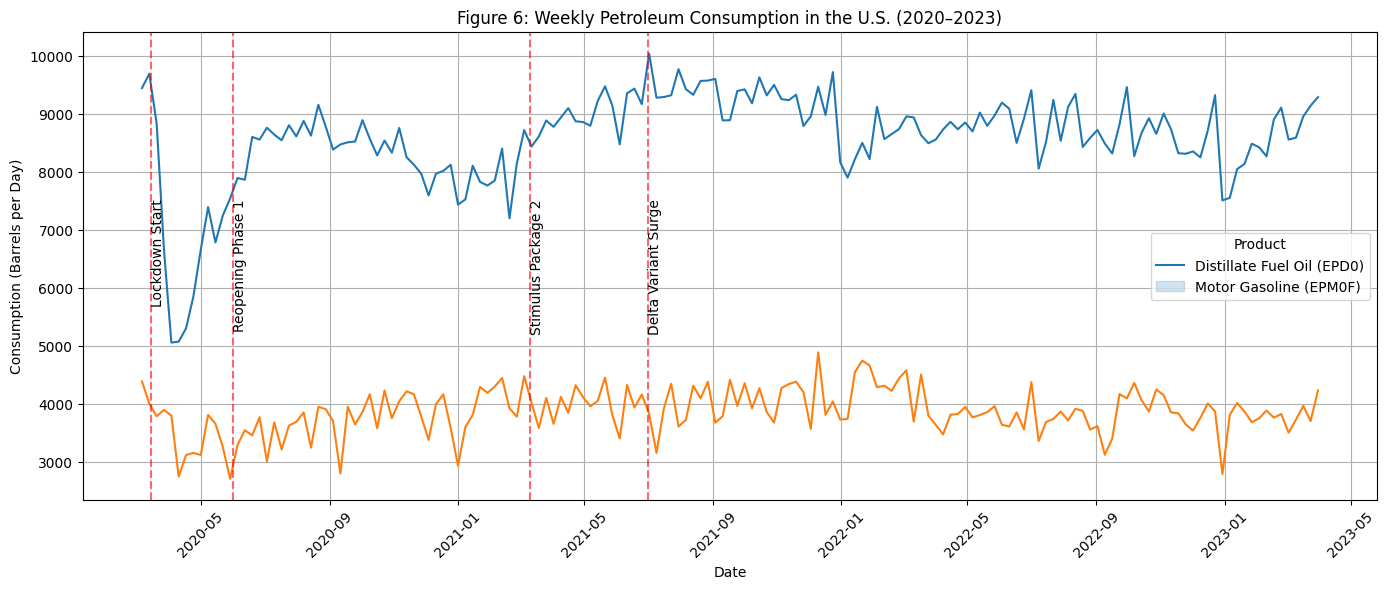

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the scraped data
file_path = "eia_petroleum_weekly.csv"
df = pd.read_csv(file_path)

# Convert period to datetime
df['period'] = pd.to_datetime(df['period'])

# Filter to two key fuel types
fuel_types = ['EPD0', 'EPM0F']
df_filtered = df[df['product'].isin(fuel_types)]

# Key COVID-19 policy dates
covid_events = {
    "Lockdown Start": "2020-03-15",
    "Reopening Phase 1": "2020-06-01",
    "Stimulus Package 2": "2021-03-11",
    "Delta Variant Surge": "2021-07-01"
}
covid_events = {k: pd.to_datetime(v) for k, v in covid_events.items()}

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x="period", y="value", hue="product")
plt.title("Figure 6: Weekly Petroleum Consumption in the U.S. (2020–2023)")
plt.xlabel("Date")
plt.ylabel("Consumption (Barrels per Day)")
plt.legend(title="Product", labels=["Distillate Fuel Oil (EPD0)", "Motor Gasoline (EPM0F)"])
plt.xticks(rotation=45)

# Add vertical lines for COVID events
for label, date in covid_events.items():
    plt.axvline(date, color='red', linestyle='--', alpha=0.6)
    plt.text(date, df_filtered['value'].max() * 0.75, label, rotation=90, verticalalignment='top', fontsize=10)

plt.tight_layout()
plt.grid(True)
plt.show()


This plot in Figure 6 shows weekly U.S. consumption of motor gasoline and distillate fuel oil from March 2020 to April 2023. Both fuel types experienced a sharp drop at the start of the pandemic, coinciding with the national lockdown in March 2020. As reopening began in mid-2020, consumption gradually recovered. Gasoline use increased more steadily, while diesel (distillate) showed a quicker rebound, possibly reflecting its role in freight and delivery services. The second stimulus package in March 2021 appears to support a small increase in gasoline demand. However, consumption remained below pre-pandemic highs for much of the period. A small dip is visible around the Delta variant surge in mid-2021, indicating renewed uncertainty or mobility restrictions.



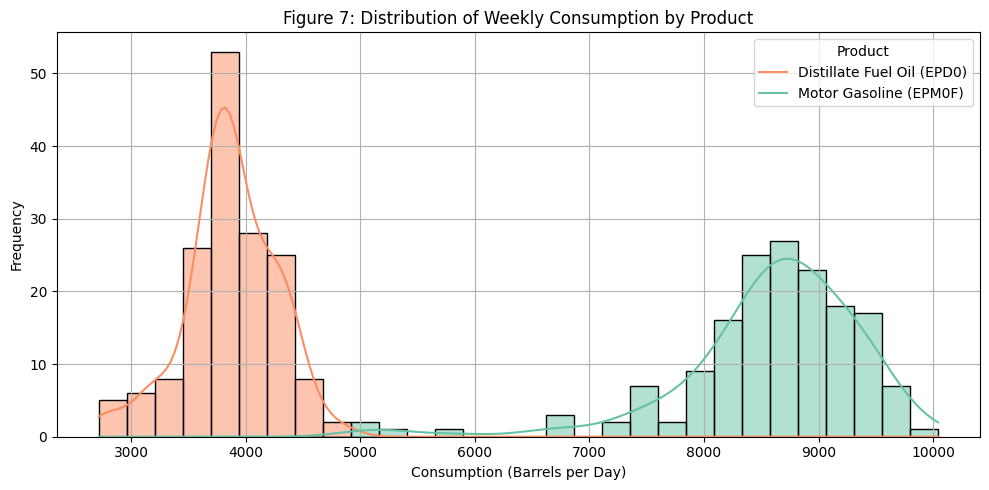

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("eia_petroleum_weekly.csv")

# Convert period to datetime
df['period'] = pd.to_datetime(df['period'])

# Filter for the two fuel types
fuel_types = ['EPD0', 'EPM0F']
df_filtered = df[df['product'].isin(fuel_types)]

# Plot: Distribution of Weekly Consumption by Product
plt.figure(figsize=(10, 5))
sns.histplot(data=df_filtered, x="value", hue="product", kde=True, bins=30, palette="Set2")
plt.title("Figure 7: Distribution of Weekly Consumption by Product")
plt.xlabel("Consumption (Barrels per Day)")
plt.ylabel("Frequency")
plt.legend(title="Product", labels=["Distillate Fuel Oil (EPD0)", "Motor Gasoline (EPM0F)"])
plt.tight_layout()
plt.grid(True)
plt.show()


This figure 7 shows the distribution of weekly consumption for two key petroleum products—Distillate Fuel Oil (EPD0) and Motor Gasoline (EPM0F)—in the U.S. from 2020 to 2023. Motor gasoline consumption is centered around a higher average value and exhibits greater variability compared to distillate fuel oil, which has a more concentrated distribution around a lower average.

From a research perspective, these suggest that consumer-oriented fuels like gasoline were more sensitive to COVID-19-related mobility and policy changes. Gasoline use dropped sharply during lockdowns but rebounded more as travel resumed. In contrast, distillate fuel oil, which is linked more to freight and industrial activity, showed relatively stable consumption. These patterns support the main research question by showing that different types of economic activity were affected in distinct ways by the pandemic, and that mobility-related behavior played a key role in shaping energy demand.

## 3.5 Regression Tree

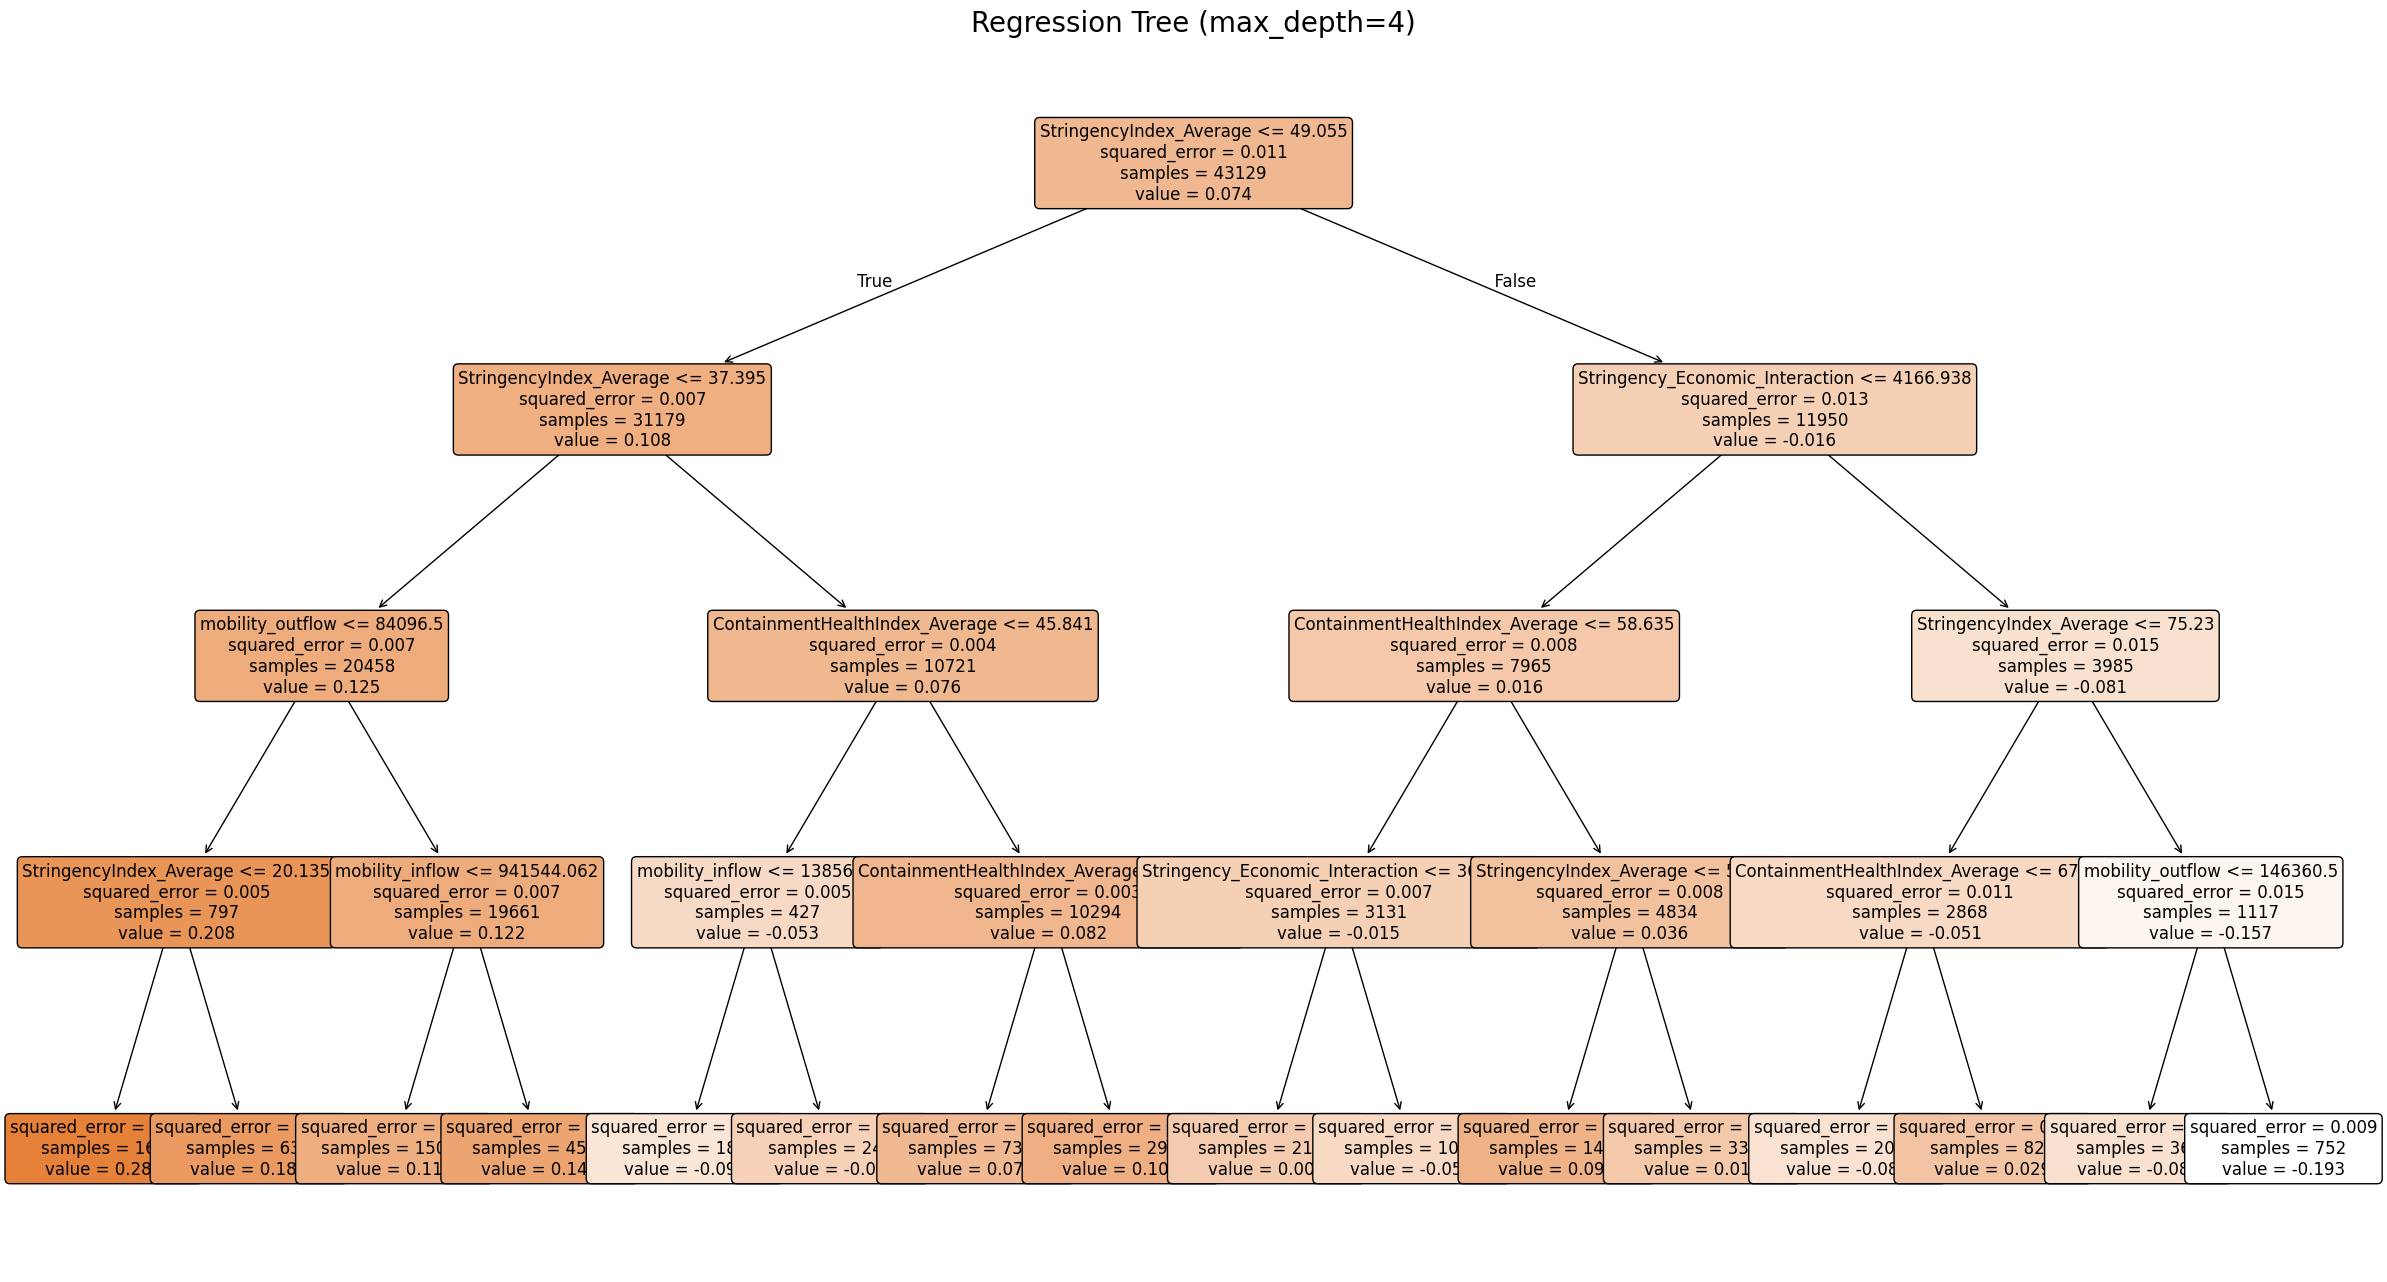

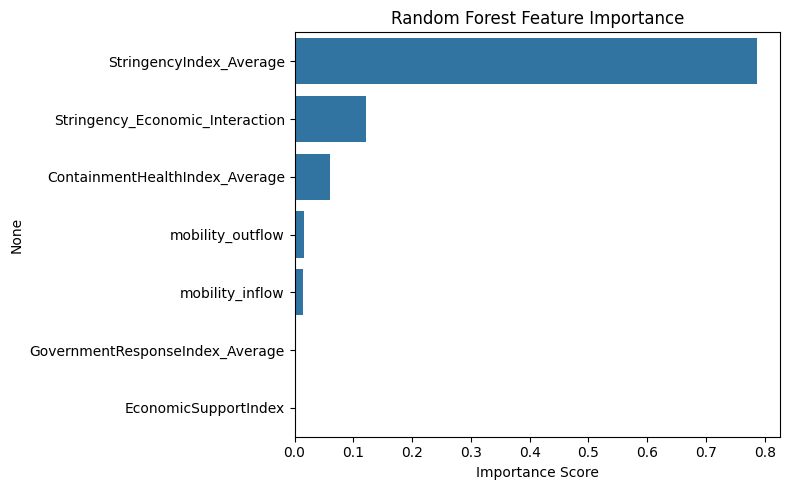

In [15]:
# Updated code including text-based regression tree output
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load and prepare the dataset
df = pd.read_csv("for_regression.csv", low_memory=False)

# Step 3: Create interaction term as in OLS Model 3
df["Stringency_Economic_Interaction"] = df["StringencyIndex_Average"] * df["EconomicSupportIndex"]

# Step 4: Select features and target based on OLS Model 3
features = [
    "mobility_outflow",
    "mobility_inflow",
    "GovernmentResponseIndex_Average",
    "ContainmentHealthIndex_Average",
    "StringencyIndex_Average",
    "EconomicSupportIndex",
    "Stringency_Economic_Interaction"
]
X = df[features]
y = df["spend_all"]

# Step 5: Handle missing values
X = X.apply(pd.to_numeric, errors="coerce")
X = X.fillna(X.mean())

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Fit a Regression Tree
tree_model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Step 8: Fit a Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 9: Evaluate models
tree_r2 = r2_score(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

# Step 10: Plot decision tree
plt.figure(figsize=(30, 16))
plot_tree(tree_model,
          feature_names=features,
          filled=True,
          rounded=True,
          max_depth=4,
          fontsize=12,
          impurity=True)  # Optional: Show error

plt.title("Regression Tree (max_depth=4)", fontsize=20)
plt.show()

# Step 11: Feature importance from Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Step 12: Output readable text-based version of the regression tree
tree_rules = export_text(tree_model, feature_names=features, max_depth=3)



In [14]:
# Step 13: Output key metrics and tree text
{
    "Regression Tree R²": round(tree_r2, 4),
    "Regression Tree MSE": round(tree_mse, 4),
    "Random Forest R²": round(rf_r2, 4),
    "Random Forest MSE": round(rf_mse, 4),
    "Top Features (Random Forest)": rf_importances.head(5).to_dict()}


{'Regression Tree R²': 0.4769,
 'Regression Tree MSE': 0.006,
 'Random Forest R²': 0.4317,
 'Random Forest MSE': 0.0065,
 'Top Features (Random Forest)': {'StringencyIndex_Average': 0.7867864363173672,
  'Stringency_Economic_Interaction': 0.1214280712438206,
  'ContainmentHealthIndex_Average': 0.06019309182514977,
  'mobility_outflow': 0.016917665986707204,
  'mobility_inflow': 0.013894424561578834}}

The goal of the regression tree is to predict spend_all by dividing the data into groups where the prediction error is as small as possible. At each step, the tree chooses a variable and a cut-off point that best splits the data to reduce differences between the predicted and actual values. To avoid overfitting, I limited the depth of the tree to four levels and required at least ten observations in each final group. This helps the model stay simple and easier to interpret, while still capturing meaningful patterns.

The regression tree model shows that StringencyIndex_Average is the most important factor. When this index is low, predicted spending is higher. Other key splits involve mobility_outflow and ContainmentHealthIndex_Average. These splits reflect the relationship between less strict policy, more movement, and higher spending. The tree explains about 47.7% of the variation in the outcome, with a low prediction error.

I also ran a random forest model, which builds many trees and averages them. In this case, the random forest performed slightly worse than the single tree, explaining 43.2% of the variation. This suggests that a few simple patterns are already strong enough to explain most of the behavior, and adding complexity doesn’t improve the result much.

The tree splits follow a clear logic. For example, spending is much lower when policy is strict and mobility is low. These breakpoints are meaningful and easy to explain, which makes the tree helpful not just for prediction but also for understanding behavior during the pandemic.

## 3.6 Random Forest

The random forest results highlight that StringencyIndex_Average is by far the most important variable, accounting for nearly 79% of the model's predictive power. The second most important variable, Stringency_Economic_Interaction, contributes around 12%, followed by ContainmentHealthIndex_Average at about 6%. Other variables like mobility_inflow, mobility_outflow, GovernmentResponseIndex_Average, and EconomicSupportIndex have very little impact individually (each less than 2%). This confirms that policy strictness and its interaction with economic support drive most of the variation in spend_all. 

## 3.7 OLS vs ML: Comparison to OLS and Error of Prediction

The regression tree output shows how policy and mobility interact to affect consumer spending. The first and most important split is based on the stringency index. When restrictions are weak and mobility outflow is high, predicted spending is much higher. In contrast, when restrictions are strict and movement is low, predicted spending drops sharply. For example, when the stringency index is below 37.4 and mobility outflow is high, predicted spend_all is around 0.14. But when the index rises above 75.2 and mobility is low, it drops to about –0.19. These patterns align with economic expectations: stricter rules and reduced movement limit in-person activity, which lowers overall spending. The tree captures these nonlinear effects in a flexible and easy-to-interpret structure. In terms of prediction accuracy, the regression tree has an R-squared of 0.477 and a mean squared error of 0.006. The random forest has a slightly lower R-squared of 0.432 and a mean squared error of 0.0065. Both models perform similarly to OLS, which had an adjusted R-squared of 0.468 in Model 3. The low error rates indicate that the models are effective at capturing the main drivers of spending, though some variation remains unexplained due to unobserved factors or randomness.








## 3.8 Conclusion

This study examines how state-level COVID-19 policies shaped consumer spending and public health outcomes by analyzing mobility trends, policy indices, and economic support measures. The findings from the regression analysis show that stricter containment measures led to lower consumer spending. Economic support policies helped reduce some of that impact. Mobility had a mixed effect. Mobility outflow was positively related to spending, possibly reflecting people moving away from strict areas to spend elsewhere. In contrast, mobility inflow did not consistently increase spending. This may reflect uncertainty, fear, or local policy differences.

Trend analysis and visualizations show that spending dropped sharply early in the pandemic. It recovered gradually as states reopened and stimulus payments reached households. Spending on essentials remained steady, while services and non-essential items were more sensitive to lockdowns. The policy distribution plots confirm that states used different levels of restrictions and support. The butterfly plot clearly shows that higher stringency was linked to lower spending. However, states with stronger support policies saw a smaller drop, which suggests that aid helped soften the blow.

The maps provide further insight. States with high COVID-19 rates did not always have stricter rules. This suggests that public compliance, health system capacity, or political choices also mattered. One map shows that financial support per COVID-19 case varied widely across states. Some states provided much more help than others. These uneven patterns raise questions about how well resources were targeted and whether support was aligned with actual need.

The machine learning results confirm and extend these findings. The regression tree shows that when the stringency index was low and mobility outflow was high, spending was higher. But when restrictions were strict and mobility dropped, predicted spending fell sharply. These breakpoints reflect real-world behavior. The random forest model finds that policy variables were the most important predictors of spending. In fact, the stringency index alone explained nearly 80 percent of the model’s power. This matches the regression findings and shows that government policy had the strongest effect on economic behavior during COVID. Mobility played a smaller role once policy was accounted for. The regression tree and forest performed similarly to the OLS model in terms of accuracy, but they provided clearer rules and captured nonlinear effects more naturally. 

Additionally, the project also contains web-scraped data from the U.S. EIA, which adds an energy consumption dimension to the analysis. Patterns in fuel use, especially during lockdowns and reopenings, reinforce the central role of mobility in mediating the policy-spending relationship. These extensions enhance the analytical depth and policy relevance of the study, offering practical insights for future crisis response strategies.

Despite these insights, the study has several limitations. First, the analysis uses state-level data and cannot reflect differences within states. Second, the policy indices do not measure how strongly policies were enforced or how well the public followed them. These real-world behaviors may have had a large effect on spending patterns.

Future research could address these gaps by using data at the city or county level, studying how people responded to policies in practice, and exploring long-term changes in consumer behavior. It would also be useful to combine survey data or real-time mobility apps with policy data to understand how people made decisions during the pandemic. Learning from this period can help governments balance health and economic goals more effectively in the future.

# Reference

1. Andersen, A. L., Hansen, E. T., Johannesen, N., & Sheridan, A. (2022). Consumer responses to the COVID-19 crisis: Evidence from bank account transaction data. Scandinavian Journal of Economics, 124(4), 905-929. https://doi.org/10.1111/sjoe.12512

2. Ang, Y., Gao, S., Liang, Y., Li, M., Rao, J., & Kruse, J. (2020). Multiscale dynamic human mobility flow dataset in the U.S. during the COVID-19 epidemic. Scientific Data, 7(390). https://www.nature.com/articles/s41597-020-00734-5

3. Baker, S. R., Farrokhnia, R. A., Meyer, S., Pagel, M., & Yannelis, C. (2020). Income, liquidity, and the consumption response to the 2020 economic stimulus payments. National Bureau of Economic Research Working Paper No. 27097. http://www.nber.org/papers/w27097

4. Carrieri, V., De Paola, M., & Gioia, F. (2021). The health-economy trade-off during the Covid-19 pandemic: Communication matters. PLOS ONE, 16(9), e0256103. https://doi.org/10.1371/journal.pone.0256103

5. Chetty, R., Friedman, J., Hendren, N., Stepner, M., & Opportunity Insights Team. (2020). The Economic Impacts of COVID-19: Evidence from a New Public Database Built Using Private Sector Data. Opportunity Insights. https://opportunityinsights.org/wp-content/uploads/2020/05/tracker_paper.pdf

6. Coibion, O., Gorodnichenko, Y., & Weber, M. (2020). The cost of the COVID-19 crisis: Lockdowns, macroeconomic expectations, and consumer spending. National Bureau of Economic Research Working Paper No. 27141. http://www.nber.org/papers/w27141

7. Courtemanche, C., Garuccio, J., Le, A., Pinkston, J., & Yelowitz, A. (2020). Strong social distancing measures in the United States reduced the COVID-19 growth rate. Health Affairs, 39(7), 1237-1246. https://doi.org/10.1377/hlthaff.2020.00608

8. Crossley, T. F., Fisher, P., & Low, H. (2021). The heterogeneous and regressive impact of COVID-19 across income groups. National Institute Economic Review, 253, R53-R67.

9. Dave, D., Friedson, A. I., Matsuzawa, K., & Sabia, J. J. (2021). Were urban cowboys enough to control COVID-19? Local shelter-in-place orders and coronavirus case growth. Journal of Urban Economics, 127, 103294. https://doi.org/10.1016/j.jue.2020.103294

10. Dong, E., Du, H., & Gardner, L. (2020). An interactive web-based dashboard to track COVID-19 in real time. The Lancet Infectious Diseases, 20(5), 533-534. https://doi.org/10.1016/S1473-3099(20)30120-1

11. Friedson, A. I., McNichols, D., Sabia, J. J., & Dave, D. (2020). Did California’s shelter-in-place order work? Early coronavirus-related public health effects. National Bureau of Economic Research Working Paper No. 26992. http://www.nber.org/papers/w26992

12. Goolsbee, A., & Syverson, C. (2020). Fear, lockdown, and diversion: Comparing drivers of pandemic economic decline. Journal of Public Economics, 191, 104311. https://doi.org/10.1016/j.jpubeco.2020.104311

13. Gupta, S., Montenovo, L., & Nguyen, T. D. (2020). Effects of social distancing policy on labor market outcomes. National Bureau of Economic Research Working Paper No. 27280. http://www.nber.org/papers/w27280

14. Hale, T., Angrist, N., Goldszmidt, R., Kira, B., Petherick, A., Phillips, T., Webster, S., Cameron-Blake, E., Hallas, L., Majumdar, S., & Tatlow, H. (2021). A global panel database of pandemic policies (Oxford COVID-19 Government Response Tracker). Nature Human Behaviour. https://doi.org/10.1038/s41562-021-01079-8

15. Hale, T., Petherick, A., Phillips, T., & Webster, S. (2020). Variation in US states' responses to COVID-19. Blavatnik School of Government Working Paper BSG-WP-2020/032. https://www.bsg.ox.ac.uk/research/publications/variation-us-states-responses-covid-19

16. Hsiang, S., Allen, D., Annan-Phan, S., et al. (2020). The effect of large-scale anti-contagion policies on the COVID-19 pandemic. Nature, 584, 262-267. https://doi.org/10.1038/s41586-020-2404-8

17. Kraemer, M. U. G., Yang, C.-H., Gutierrez, B., et al. (2020). The effect of human mobility and control measures on the COVID-19 epidemic in China. Science, 368(6490), 493-497. https://doi.org/10.1126/science.abb4218

18. Ligo, A. K., Mahoney, E., Cegan, J., et al. (2021). Relationship among state reopening policies, health outcomes, and economic recovery through the first wave of the COVID-19 pandemic in the U.S. arXiv preprint arXiv:2105.01142.

19. Toxvaerd, F. (2021). Equilibrium social distancing. Cambridge Working Papers in Economics 2110. https://www.econ.cam.ac.uk/publications/cwpe/2021

20. U.S. Energy Information Administration (EIA). Open Data API. U.S. Department of Energy. Retrieved Apr 19th 2025, from https://www.eia.gov/opendata/